# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 1

In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

Acima são importadas algumas bilbiotecas para auxiliarem na resolução do problema. 

A seguir, é montado um dataset com as informações de [Iris](http://archive.ics.uci.edu/dataset/53/iris). O dataset é composto pelas medidas da sepala (comprimento x largura), em centímetros, e petala (comrimento x largura), em centímetros, de três espécies distintas: Iris Setosa, Iris Versicolour e Iris Virginica.

In [2]:
dataset_raw = np.loadtxt("iris.data", delimiter=",", dtype=str)
labels_dic = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
dataset_len = len(dataset_raw)

for i in range(dataset_len):
    dataset_raw[i, 4] = labels_dic[dataset_raw[i, 4]]

train_len = round(0.7 * dataset_len)
validation_len = round(0.15 * dataset_len)
dataset_raw = np.random.permutation(dataset_raw)

dataset = dataset_raw[:, 0:4].astype('float32')
dataset_labels = dataset_raw[:,4].astype('int64')

Para realizar o treinamento de uma Feedforward Neural Network, o dataset original é separado em três, seguindo as respectivas proporções:

- Dataset de treinamento (70%);
- Dataset de validação (15%);
- Dataset de teste (15%).

Antes da separação, é realizado um shuffle do dataset original.

In [3]:
train_dataset = torch.Tensor(dataset[0 : train_len])
train_label = torch.LongTensor(dataset_labels[0 : train_len])

validation_dataset = torch.Tensor(dataset[train_len : train_len + validation_len])
validation_label = torch.LongTensor(dataset_labels[train_len : train_len + validation_len])

test_dataset = torch.Tensor(dataset[train_len + validation_len: dataset_len])
test_label = torch.LongTensor(dataset_labels[train_len + validation_len: dataset_len])

In [32]:
batch_size = 35
dataset_train = TensorDataset(train_dataset, train_label)
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

dataset_valid = TensorDataset(validation_dataset, validation_label)
dataloader_valid = DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)


Definição do modelo da rede neural, que apresenta uma cada de entrada, uma oculta e a de saída.

In [100]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=10, bias=True)
        self.fc2 = nn.Linear(in_features=10, out_features=3, bias=True)
    def forward(self, out):
        out = torch.sigmoid(self.fc1(out))
        out = torch.sigmoid(self.fc2(out))
        return out
    
learning_rate = 0.5
loss = nn.CrossEntropyLoss()

Treinamento da rede:

In [107]:
def training(NN, dataloader_train, dataloader_valid, criterion, learning_rate):
    # Recreates the model and the optimizer to ensure that we will not train an already trained model.
    model = NN
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Define the number os epochs.
    num_epochs = 500

    cost = torch.zeros([])
    output = torch.zeros(batch_size, 3)
    costs_train = []
    accs_train = []
    costs_valid = []
    accs_valid = []

    # Loop that will run the code num_epoch times
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        model.train()
        for data, label in dataloader_train:
          
            optimizer.zero_grad()
            output = model(data)
            cost = criterion(output, label.view(label.shape[0]))
            cost.backward()
            optimizer.step()
          
            # Counting of correct labels and total examples
            out2 = (torch.log_softmax(output,dim=1))
            _, predict = torch.max(out2, dim = 1)

            for i in range(0, len(label)):
              total = total + 1
              if predict[i] == label[i]: 
                correct = correct + 1

        # Adding elements to lists
        acc = (correct / total) * 100
        accs_train.append(acc) #Adiciona essa acurácia a sua lista
        costs_train.append(cost.item())


        correct = 0
        total = 0
        model.eval()
        for data, label in dataloader_valid:
            output = model(data)
            cost = criterion(output, label.view(label.shape[0]))
            # Counting of correct labels and total examples
            out2 = (torch.log_softmax(output,dim=1))
            _, predict = torch.max(out2, dim = 1)

            for i in range(0, len(label)):
              total = total + 1
              if predict[i] == label[i]: 
                correct = correct + 1
        # Computation of accuracy
        acc = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem
        accs_valid.append(acc) #Adiciona essa acurácia a sua lista
        costs_valid.append(cost.item())

        print('epoch [{}/{}], cost:{:.4f}'.format(epoch + 1, num_epochs, cost.item()))

    return costs_train, accs_train, costs_valid, accs_valid

In [108]:
costs_train, accs_train, costs_valid, accs_valid = training(NeuralNetwork(), dataloader_train, dataloader_valid, loss, learning_rate)

epoch [1/500], cost:1.1040
epoch [2/500], cost:1.1121
epoch [3/500], cost:1.1208
epoch [4/500], cost:1.1262
epoch [5/500], cost:1.1285
epoch [6/500], cost:1.1299
epoch [7/500], cost:1.1280
epoch [8/500], cost:1.1277
epoch [9/500], cost:1.1241
epoch [10/500], cost:1.1212
epoch [11/500], cost:1.1194
epoch [12/500], cost:1.1146
epoch [13/500], cost:1.1112
epoch [14/500], cost:1.1072
epoch [15/500], cost:1.1032
epoch [16/500], cost:1.0986
epoch [17/500], cost:1.0938
epoch [18/500], cost:1.0863
epoch [19/500], cost:1.0806
epoch [20/500], cost:1.0757
epoch [21/500], cost:1.0694
epoch [22/500], cost:1.0619
epoch [23/500], cost:1.0549
epoch [24/500], cost:1.0482
epoch [25/500], cost:1.0417
epoch [26/500], cost:1.0344
epoch [27/500], cost:1.0281
epoch [28/500], cost:1.0218
epoch [29/500], cost:1.0151
epoch [30/500], cost:1.0095
epoch [31/500], cost:1.0041
epoch [32/500], cost:0.9977
epoch [33/500], cost:0.9918
epoch [34/500], cost:0.9879
epoch [35/500], cost:0.9812
epoch [36/500], cost:0.9751
e

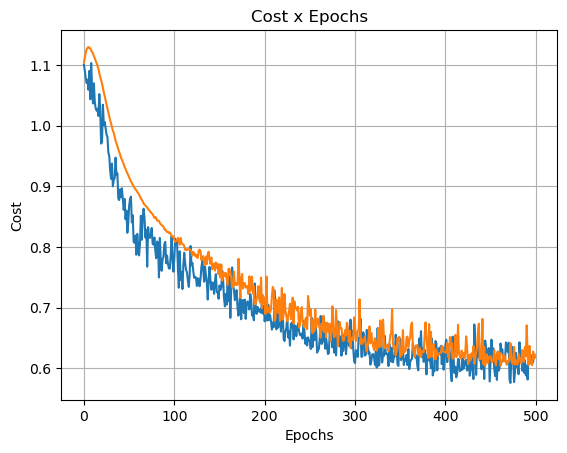

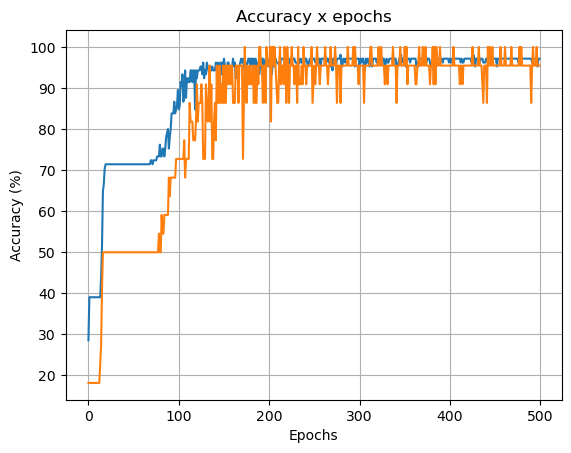

In [109]:
plt.figure()
plt.plot(costs_train)
plt.plot(costs_valid)
plt.title('Cost x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(accs_train)
plt.plot(accs_valid)
plt.title('Accuracy x epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()